In [1]:
import seaborn
%matplotlib inline

In [2]:
from sklearn import linear_model
from ccd.models import lasso
import datetime
import aniso8601
from itertools import cycle, islice


In [3]:
import numpy as np

In [4]:
ix = np.arange(0,100)
x1 = np.full((100,), 1, dtype=np.int64)
x2 = np.full((100,), 2, dtype=np.int64)
x3 = np.full((100,), 3, dtype=np.int64)
xs = np.vstack((x1,x2,x3))

In [31]:
def gen_acquisition_dates(interval):
    dates = aniso8601.parse_repeating_interval(interval)
    return dates

def gen_acquisition_delta(interval):
    epoch = datetime.datetime.utcfromtimestamp(0).date()
    dates = gen_acquisition_dates(interval)
    yield [(date-epoch).days for date in dates]

def acquisition_delta(interval):
    return list(*gen_acquisition_delta(interval))

def repeated_values(samples, seed=42):
    np.random.seed(seed)
    sine = np.array(list(islice(cycle([0, 1, 0, -1]), None, samples)))
    # noise = np.array(np.random.random(samples))
    return sine#+noise

In [30]:
times = np.array(acquisition_delta('R50/P16D/2000-01-01'))
# reds = np.hstack((repeated_values(25)+10, repeated_values(25)+15))
reds = repeated_values(50)+10


NameError: name 'noise' is not defined

In [35]:
fn = lasso.fitted_model(times, reds)

In [33]:
fn.coef_, fn.intercept_

(array([  0.00000000e+00,   0.00000000e+00,   7.09617779e-05,
          0.00000000e+00]), 9.7162127208642772)

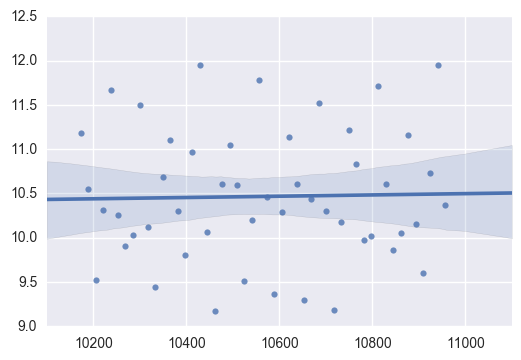

In [36]:
seaborn.regplot(x=times,y=reds)

In [ ]:
def predict(model, t):
    c1, c2, c3, c4 = model.coef_
    return c1 * np.sin(t/365.25) + c2*np.cos(t/365.25) + c3*t + c4

In [ ]:
t = 10957
np.array([np.sin(t/365.25), np.cos(t/365.25), t, 1]).reshape(-1,1)

In [ ]:
def predict_2(model, t):
    M = np.array([[np.sin(t/365.25), np.cos(t/365.25), t, 1]])
    return model.predict(M)

In [ ]:
predict(fn,10957)

In [ ]:
predict_2(fn, 10957)